# Лабораторна робота №8 ІАД

<b>Виконала:</b> студентка МІТ-31, Панченко Владислава

<b>Завдання:</b>
1. Виконати вирішення задачі класифікації для 3 класів з набору даних food101 https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip . 
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком. <b>n=15</b> <br>
i1=15-1=14, i2=15+29=44, i3=15+59=74 <br>
carrot_cake, fried_rice, peking_duck

Found 225 images belonging to 3 classes.


Found 750 images belonging to 3 classes.
Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4956 - loss: 1.2367 - val_accuracy: 0.8560 - val_loss: 0.3954
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8883 - loss: 0.3953 - val_accuracy: 0.9240 - val_loss: 0.2413
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9168 - loss: 0.2457 - val_accuracy: 0.9387 - val_loss: 0.1862
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9479 - loss: 0.1373 - val_accuracy: 0.9013 - val_loss: 0.2504
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9302 - loss: 0.2005 - val_accuracy: 0.9307 - val_loss: 0.2126
Image shape: (384, 512, 3)


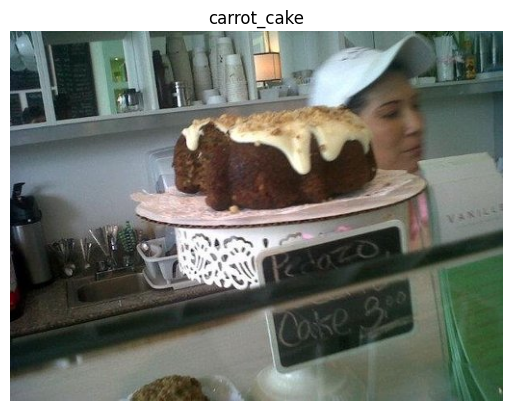

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os

current_dir = os.getcwd()

train_dir = os.path.join(current_dir, "train")
test_dir = os.path.join(current_dir, "test")


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = os.path.join(target_dir, target_class)

  # Get a random image path
  random_image = random.choice(os.listdir(target_folder))

  # Read in the image and plot it using matplotlib
  img = imread( os.path.join(target_folder, random_image))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Заморожуємо базову модель

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # 3 класи

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
)

img= view_random_image(target_dir=train_dir, target_class="carrot_cake")